#📌 Extracão

In [1]:
import pandas as pd
import requests
import json
import numpy as np

dados = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
resultado = json.loads(dados.text)

dados = pd.json_normalize(resultado, sep='_')
dados

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [3]:
dados.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [4]:
dados['account_Charges_Total'].fillna('0.0', inplace = True)

/tmp/ipython-input-3243272005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['account_Charges_Total'].fillna('0.0', inplace = True)


In [5]:
dados.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [6]:
linhas_duplicadas = dados.duplicated()
numero_linhas_duplicadas = linhas_duplicadas.sum()
print(f'\nNúmero de linhas duplicadas: {numero_linhas_duplicadas}')


Número de linhas duplicadas: 0


In [7]:
for coluna in dados.columns:
    valores_unicos = dados[coluna].unique()
    print(f'Valores únicos na coluna {coluna}:')
    print(valores_unicos)
    print('\n')

Valores únicos na coluna customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


Valores únicos na coluna Churn:
['No' 'Yes' '']


Valores únicos na coluna customer_gender:
['Female' 'Male']


Valores únicos na coluna customer_SeniorCitizen:
[0 1]


Valores únicos na coluna customer_Partner:
['Yes' 'No']


Valores únicos na coluna customer_Dependents:
['Yes' 'No']


Valores únicos na coluna customer_tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


Valores únicos na coluna phone_PhoneService:
['Yes' 'No']


Valores únicos na coluna phone_MultipleLines:
['No' 'Yes' 'No phone service']


Valores únicos na coluna internet_InternetService:
['DSL' 'Fiber optic' 'No']


Valores únicos na coluna internet_OnlineSecurity:
['No' 'Yes' 'No internet service']


Valores único

In [8]:
dados['Churn'] = dados['Churn'].replace('', 'Não informado')

dados = dados.drop(dados[dados['Churn'] == 'Não informado'].index)

dados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [9]:
dados['Contas_Diarias'] = dados['account_Charges_Monthly'] / 30
dados['Contas_Diarias'] = (dados['account_Charges_Monthly'] / 30).apply(lambda x: f'{x:,.2f}')

dados['Contas_Diarias'] = dados['Contas_Diarias'].astype(np.float64)

In [10]:
dados['account_Charges_Total'] = dados['account_Charges_Total'].str.strip()
dados['account_Charges_Total'] = dados['account_Charges_Total'].replace('', np.nan)
dados['account_Charges_Total'] = dados['account_Charges_Total'].astype(np.float64)

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

#📊 Carga e análise

In [12]:
analise_descritiva = dados.describe().T

analise_descritiva['mediana'] = dados.median(numeric_only=True)

analise_descritiva

,count,mean,std,min,25%,50%,75%,max,mediana
customer_SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00,0.000
customer_tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00,29.000
account_Charges_Monthly,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75,70.350
account_Charges_Total,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80,1397.475
Contas_Diarias,7043.0,2.158697,1.002991,0.61,1.18,2.340,2.9900,3.96,2.340


In [13]:
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [14]:
churn_analise = dados.Churn.value_counts().reset_index()
churn_analise.columns = ['Churn', 'Quantidade']

churn_analise

,Churn,Quantidade
0,No,5174
1,Yes,1869


/tmp/ipython-input-2934743809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='Quantidade', data=churn_analise, palette=cores_churn)


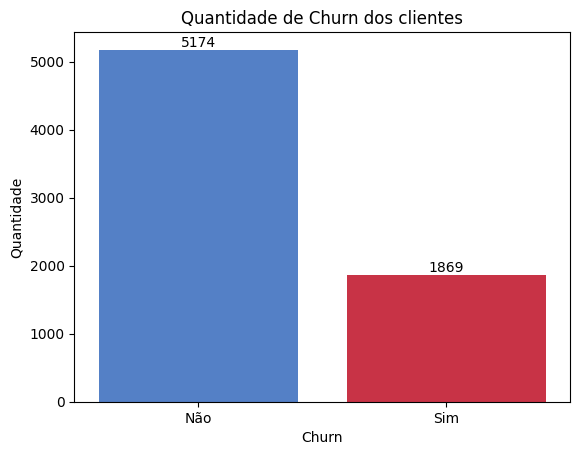

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cores_churn = {'Yes': '#E11A33', 'No': '#417BD9'}

sns.barplot(x='Churn', y='Quantidade', data=churn_analise, palette=cores_churn)

plt.title('Quantidade de Churn dos clientes')
plt.xlabel('Churn')
plt.ylabel('Quantidade')

plt.xticks(ticks=['No', 'Yes'], labels=['Não', 'Sim'])

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge')

plt.show()

In [16]:
dados_genero_analise = dados.groupby(['customer_gender', 'Churn']).size().reset_index(name='Quantidade')

dados_genero_analise

,customer_gender,Churn,Quantidade
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


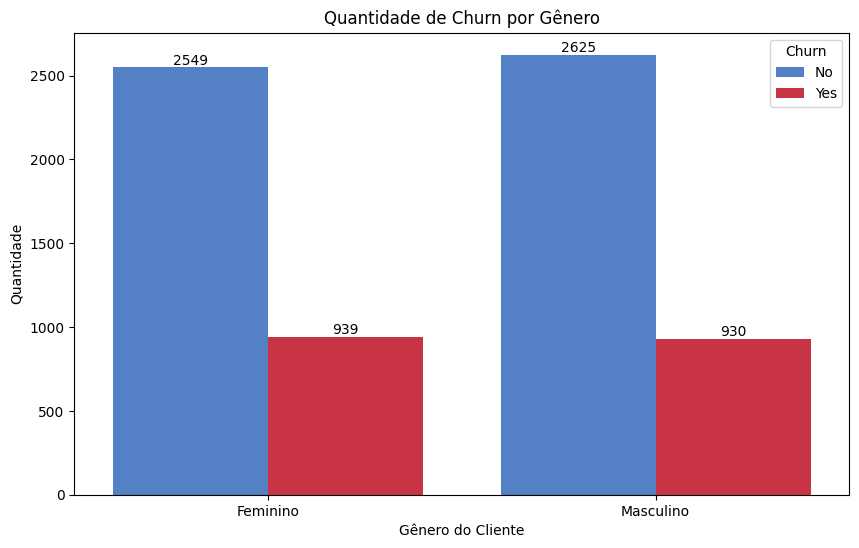

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_gender', y='Quantidade', hue='Churn', data=dados_genero_analise, palette=cores_churn)

plt.title('Quantidade de Churn por Gênero')
plt.xlabel('Gênero do Cliente')
plt.ylabel('Quantidade')

plt.xticks(ticks=['Female', 'Male'], labels=['Feminino', 'Masculino'])

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge')

plt.show()

In [18]:
dados_maior65_analise = dados.groupby(['customer_SeniorCitizen', 'Churn']).size().reset_index(name='Quantidade')

dados_maior65_analise

,customer_SeniorCitizen,Churn,Quantidade
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


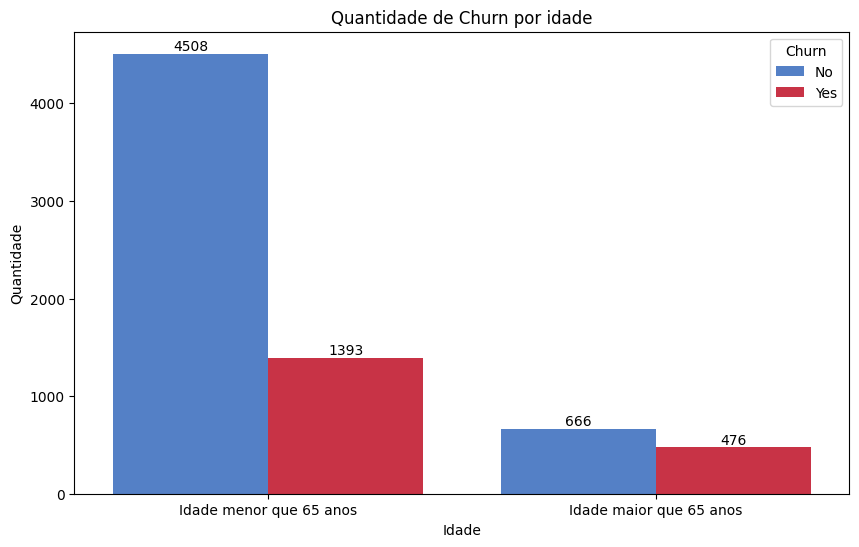

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_SeniorCitizen', y='Quantidade', hue='Churn', data=dados_maior65_analise, palette=cores_churn)

plt.title('Quantidade de Churn por idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

plt.xticks(ticks=[0, 1], labels=['Idade menor que 65 anos', 'Idade maior que 65 anos'])

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge')

plt.show()

In [20]:
dados_contrato_analise = dados.groupby(['account_Contract', 'Churn']).size().reset_index(name='Quantidade')

dados_contrato_analise

,account_Contract,Churn,Quantidade
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


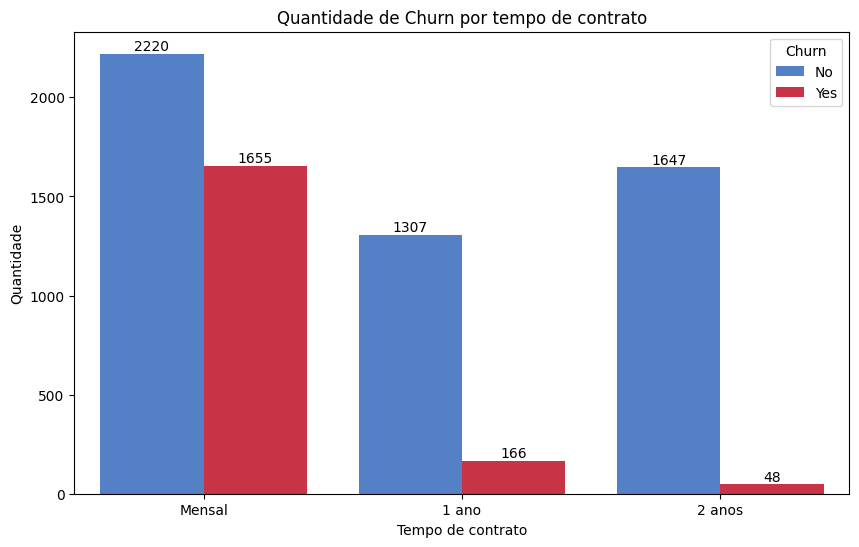

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='account_Contract', y='Quantidade', hue='Churn', data=dados_contrato_analise, palette=cores_churn)

plt.title('Quantidade de Churn por tempo de contrato')
plt.xlabel('Tempo de contrato')
plt.ylabel('Quantidade')

plt.xticks(ticks=['Month-to-month', 'One year', 'Two year'], labels=['Mensal', '1 ano', '2 anos'])

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge')

plt.show()

In [22]:
dados_pagamento_analise = dados.groupby(['account_PaymentMethod', 'Churn']).size().reset_index(name='Quantidade')

dados_pagamento_analise

,account_PaymentMethod,Churn,Quantidade
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


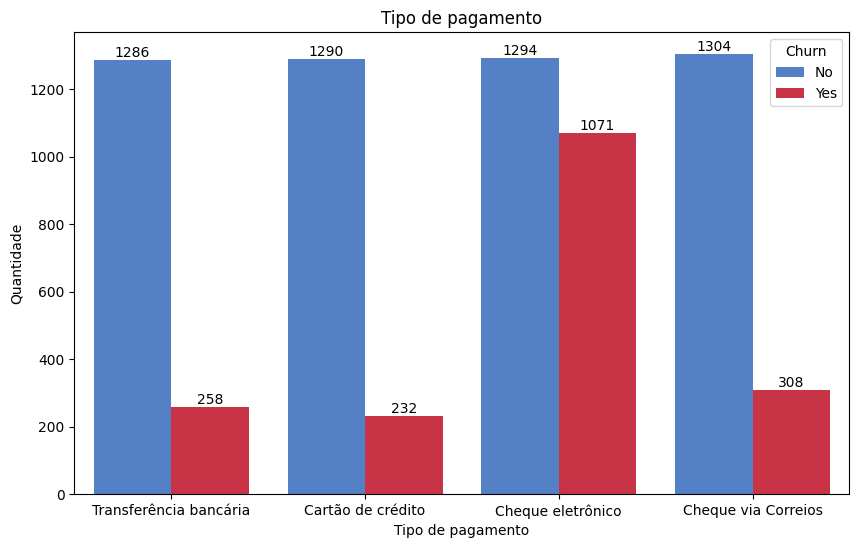

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='account_PaymentMethod', y='Quantidade', hue='Churn', data=dados_pagamento_analise, palette=cores_churn)

plt.title('Tipo de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Quantidade')

plt.xticks(ticks=['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'], labels=['Transferência bancária', 'Cartão de crédito', 'Cheque eletrônico', 'Cheque via Correios'])

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge')

plt.show()

In [24]:
dados_parceiro_analise = dados.groupby(['customer_Partner', 'Churn']).size().reset_index(name='Quantidade')

dados_parceiro_analise

,customer_Partner,Churn,Quantidade
0,No,No,2441
1,No,Yes,1200
2,Yes,No,2733
3,Yes,Yes,669


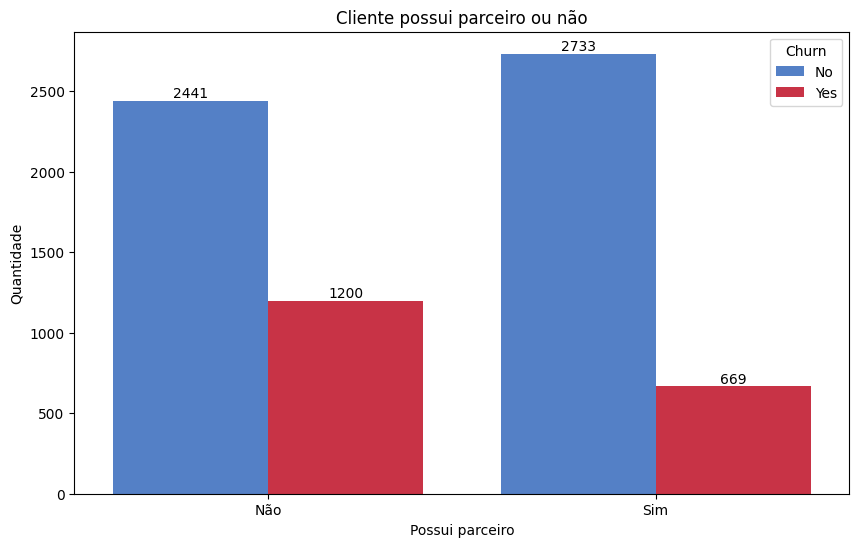

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_Partner', y='Quantidade', hue='Churn', data=dados_parceiro_analise, palette=cores_churn)

plt.title('Cliente possui parceiro ou não')
plt.xlabel('Possui parceiro')
plt.ylabel('Quantidade')

plt.xticks(ticks=['No', 'Yes'], labels=['Não', 'Sim'])

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge')

plt.show()

In [26]:
dados_dependente_analise = dados.groupby(['customer_Dependents', 'Churn']).size().reset_index(name='Quantidade')

dados_dependente_analise

,customer_Dependents,Churn,Quantidade
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


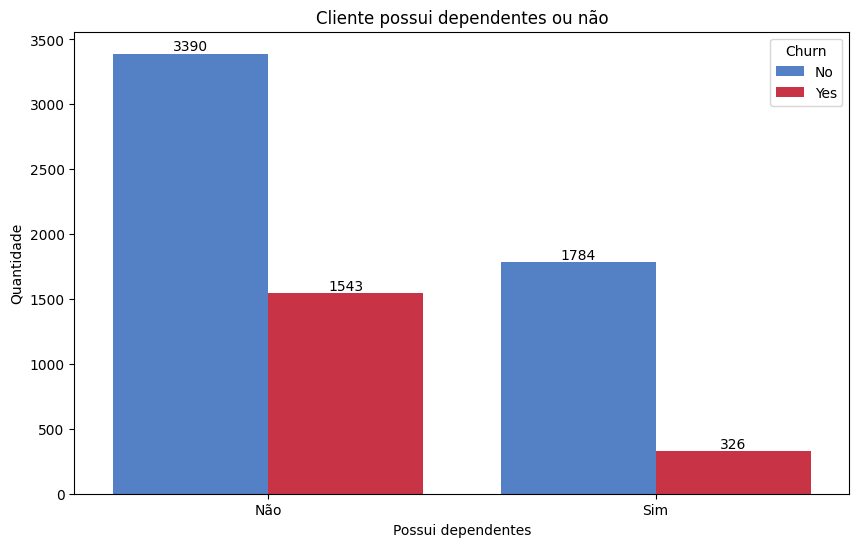

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_Dependents', y='Quantidade', hue='Churn', data=dados_dependente_analise, palette=cores_churn)

plt.title('Cliente possui dependentes ou não')
plt.xlabel('Possui dependentes')
plt.ylabel('Quantidade')

plt.xticks(ticks=['No', 'Yes'], labels=['Não', 'Sim'])

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge')

plt.show()

In [28]:
dados_tempo_analise = dados.groupby(['customer_tenure', 'Churn']).size().reset_index(name='Quantidade')

dados_tempo_analise

,customer_tenure,Churn,Quantidade
0,0,No,11
1,1,No,233
2,1,Yes,380
3,2,No,115
4,2,Yes,123
...,...,...,...
140,70,Yes,11
141,71,No,164
142,71,Yes,6
143,72,No,356


In [29]:
dados_tempo_analise = dados.groupby(['customer_tenure', 'Churn']).size().reset_index(name='Quantidade')
bins = [-1, 11, 47, dados['customer_tenure'].max()]
labels = ['Até 11 meses', 'De 12 a 47 meses', '48 meses ou mais']

dados['customer_tenure'] = pd.cut(dados['customer_tenure'], bins=bins, labels=labels, right=True)

dados_tempo_analise = dados.groupby(['customer_tenure', 'Churn']).size().reset_index(name='Quantidade')

dados_tempo_analise

/tmp/ipython-input-955692999.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_tempo_analise = dados.groupby(['customer_tenure', 'Churn']).size().reset_index(name='Quantidade')


,customer_tenure,Churn,Quantidade
0,Até 11 meses,No,1070
1,Até 11 meses,Yes,999
2,De 12 a 47 meses,No,2023
3,De 12 a 47 meses,Yes,648
4,48 meses ou mais,No,2081
5,48 meses ou mais,Yes,222


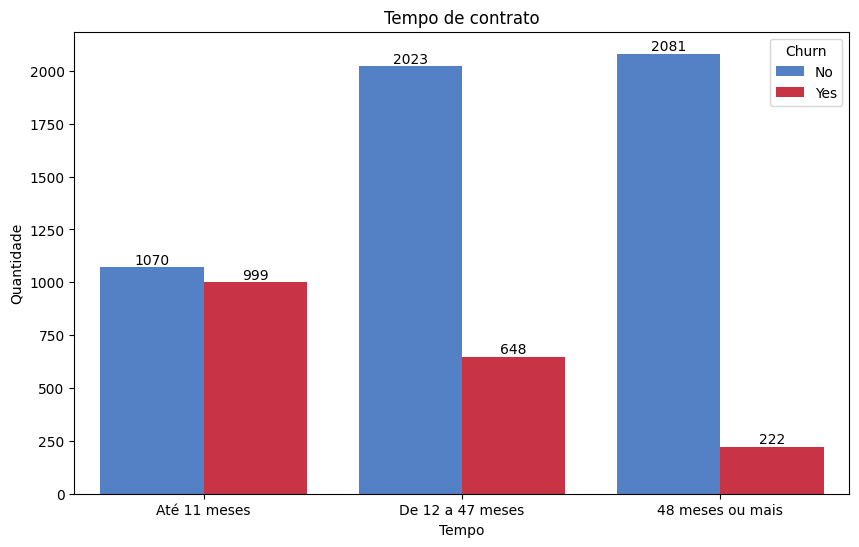

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_tenure', y='Quantidade', hue='Churn', data=dados_tempo_analise, palette=cores_churn)

plt.title('Tempo de contrato')
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge')

plt.show()

#📄Relatorio Final

##🔍 Introdução


O objetivo deste projeto é analisar dados de clientes da empresa TelecomX para entender os fatores que influenciam a evasão (churn) e auxiliar na criação de estratégias para reduzir essa perda de clientes.

O churn refere-se aos clientes que cancelam seus serviços em determinado período. Reduzir o churn é crucial para a sustentabilidade da empresa, pois adquirir novos clientes geralmente custa mais do que manter os atuais.

##🧼 Limpeza e Tratamento de Dados

O processo de preparação dos dados incluiu as seguintes etapas:

###1. Importação dos Dados

 * Os dados foram carregados de um arquivo JSON hospedado no GitHub e transformados em um DataFrame utilizando pandas.

###2. Verificação de Tipos e Nulos

 * Foram identificadas colunas com valores nulos, principalmente account_Charges_Total.

 * Valores nulos nessa coluna foram preenchidos com 0.0.

###3. Remoção de Dados Inválidos

 * Clientes com valor vazio na coluna Churn foram excluídos.

 * Linhas duplicadas também foram identificadas e eliminadas.

###4. Conversões e Ajustes

 * Colunas numéricas foram convertidas corretamente para float.

 * Criada uma nova coluna Contas_Diarias a partir de account_Charges_Monthly.

## 📊 Análise Exploratória de Dados

As seguintes análises e visualizações com Seaborn e Matplotlib foram realizadas:

### Análise Descritiva

 * Métricas como média, mediana, desvio padrão e quartis foram obtidas para variáveis numéricas.

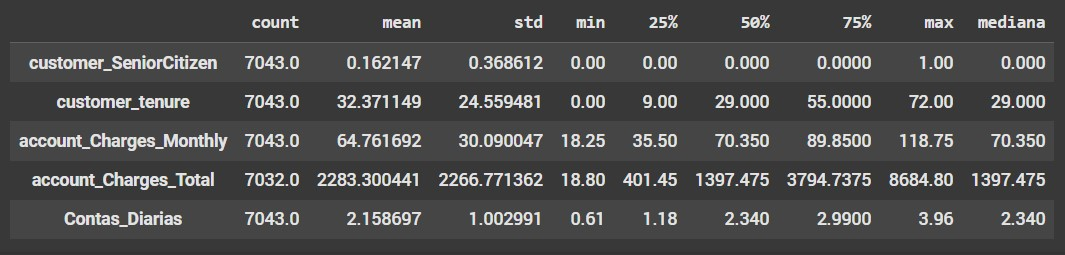

### Distribuição do Churn

 * Foi verificada a proporção de clientes que cancelaram (Yes) vs. mantiveram (No) o serviço.

 * A maioria dos clientes permaneceu, mas a taxa de churn é significativa.

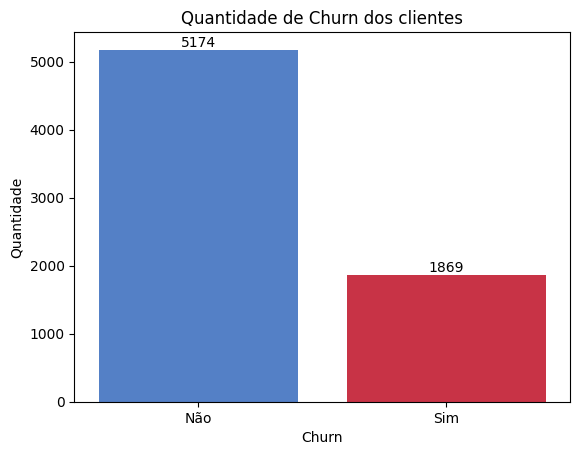

### Quantidade de Churn por Gênero

 * O gênero tem pouca influência direta no churn, mas mulheres apresentam uma taxa de evasão um pouco mais alta proporcionalmente.

 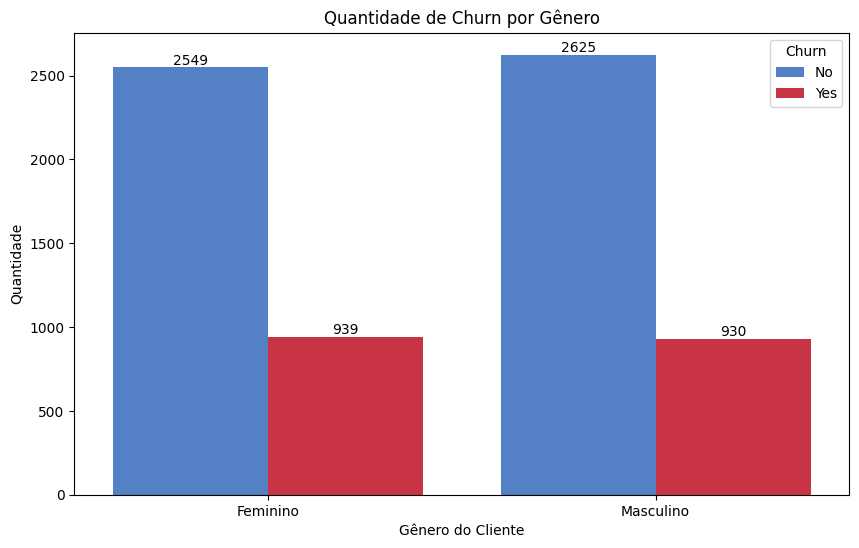

### Quantidade de Churn por idade

 * A maioria dos clientes tem menos de 65 anos, o número de cancelamentos é considerável.

 * Para clientes com mais de 65 anos, o número total é menor, mas a proporção de churn é alta, mais da metade cancelaram o serviço.

 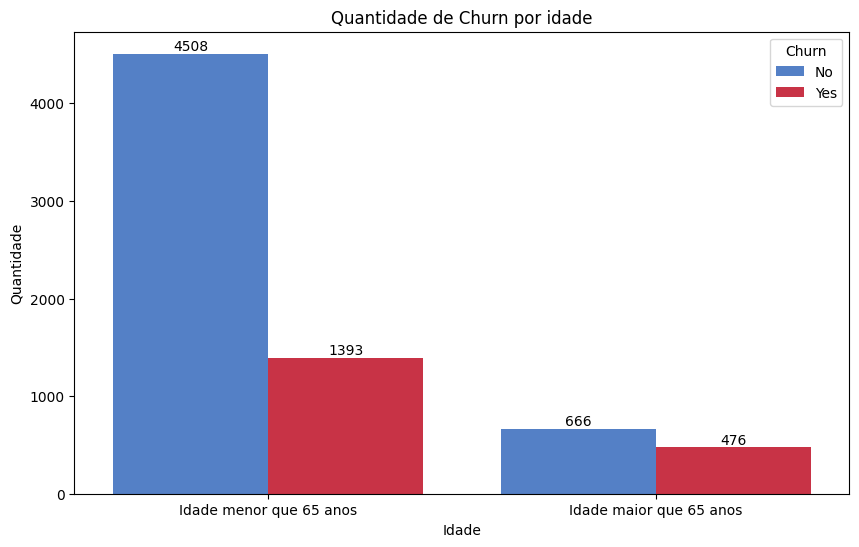

### Quantidade de Churn por tempo de contrato

 * Contratos mais longos estão associados a menor evasão. Clientes com contrato mensal são muito mais propensos a cancelar.

 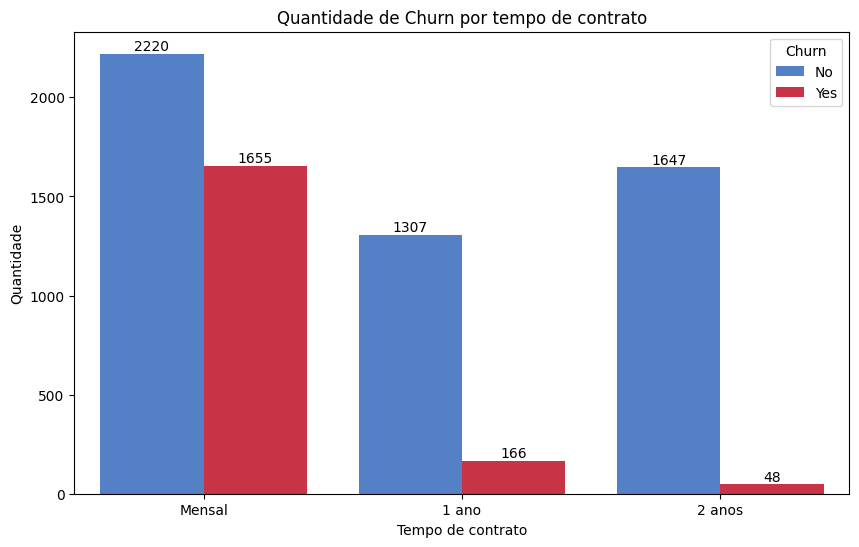

### Quantidade de Churn por Tipo de pagamento

 * O cheque eletrônico está fortemente associado ao churn (1071 cancelamentos), muito acima dos outros métodos.

 * Outros meios de pagamento como transferência bancária, cartão de crédito e cheque via Correios têm churn consideravelmente menor.

 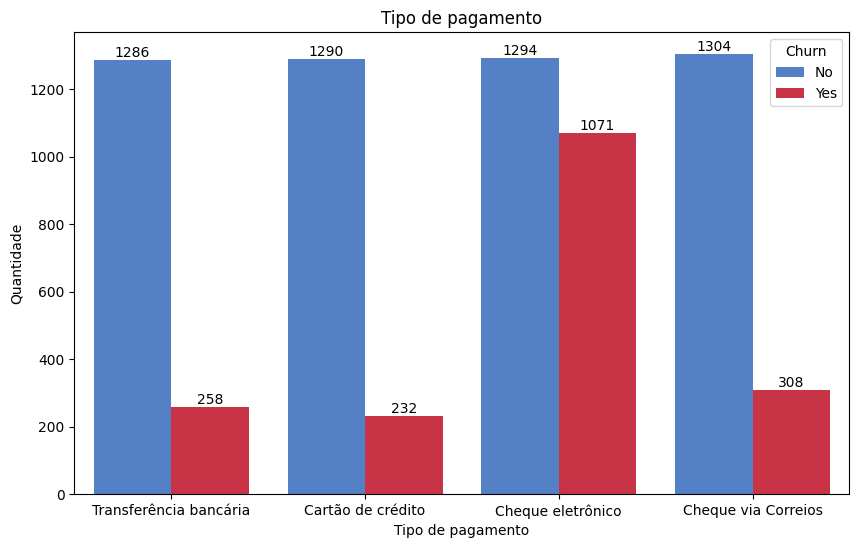

### Quantidade de Churn por Cliente possui parceiro ou não

 * Clientes com parceiro tendem a ser mais estáveis e fiéis ao serviço, apresentando um numero de churn bem menor comparado a clientes sem parceiro.

 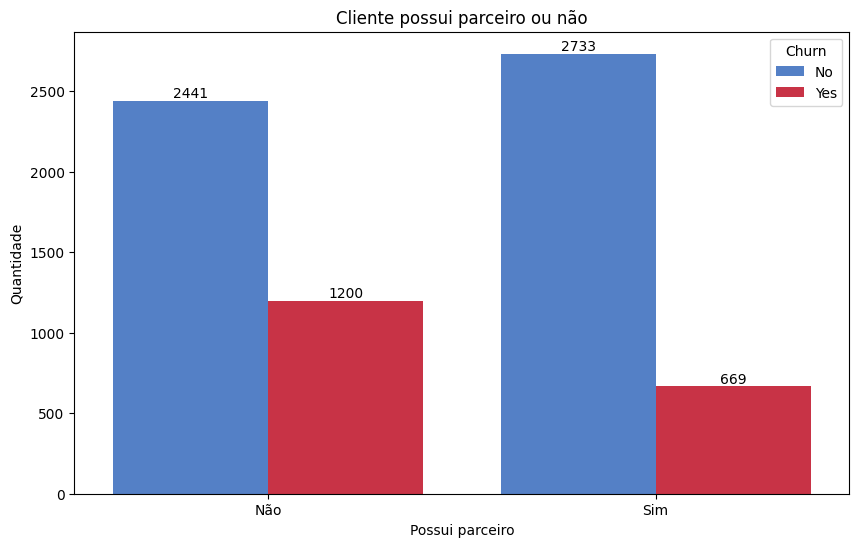

### Quantidade de Churn por Cliente possui dependentes ou não

 * Clientes com dependentes costumam manter o serviço ativo, indicando maior comprometimento ou necessidade do serviço para a família.

 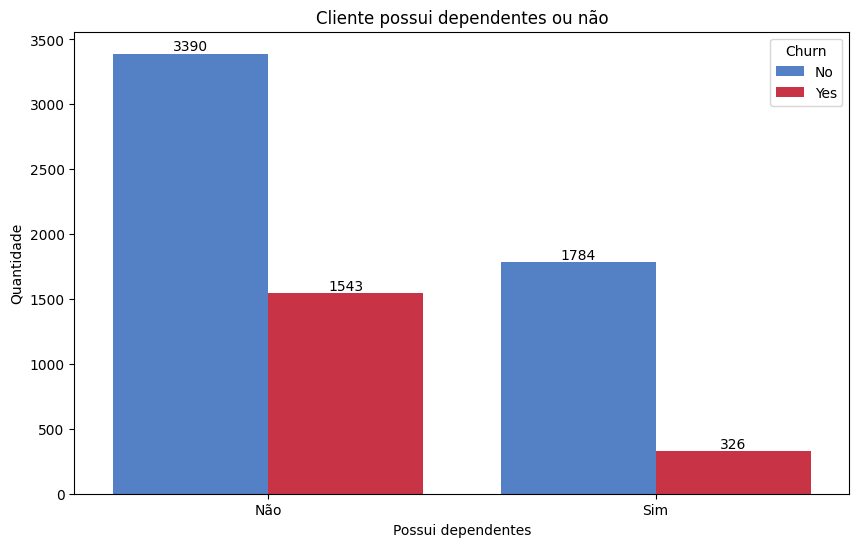

### Quantidade de Churn por Tempo de contrato

 * Clientes com menos de 1 ano de contrato apresentam um numero cancelamento quase igual ao numero dos que permanecem.

 * A medida que o tempo de contrato aumenta, o número de cancelamentos diminui significativamente.

 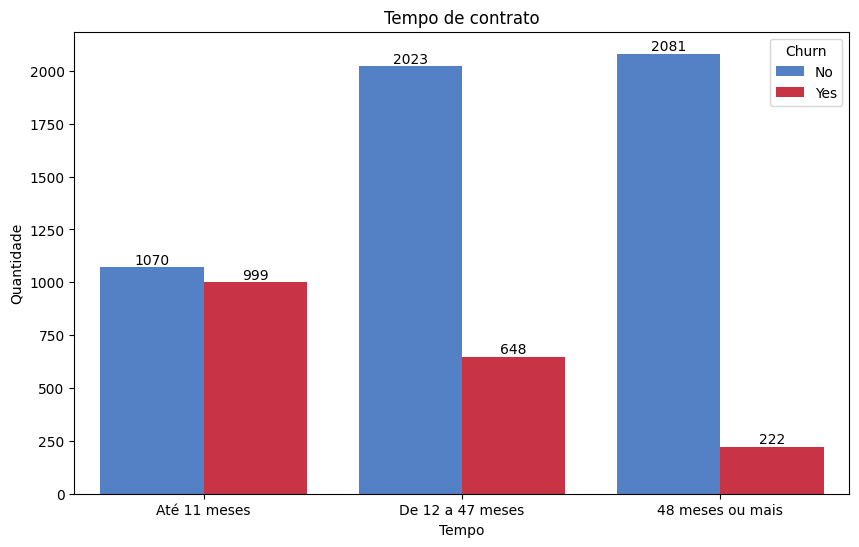


## 📌 Conclusões e Insights

 * Clientes com maiores valores de cobrança mensal tendem a apresentar churn mais elevado.

 * O tratamento e padronização dos dados permitiram uma base limpa e confiável para futuras análises mais avançadas (como modelagem preditiva).

## 💡 Recomendações

1. Programa de Retenção para Clientes com Cobranças Altas
 * Implementar campanhas para fidelizar clientes com cobranças mensais elevadas, pois são mais propensos a sair.

2. Melhorar Coleta de Dados
 * Padronizar preenchimento dos campos e obrigar dados críticos como “Churn” para melhor rastreamento.

3. Monitoramento Contínuo
 * Criar dashboards em tempo real com as principais métricas de churn, permitindo ações rápidas por parte do time comercial.